In [112]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from IPython.display import display

df = pd.read_csv('Dog Breeds Around The World.csv')

df.head()

,Name,Origin,Type,Unique Feature,Friendly Rating (1-10),Life Span,Size,Grooming Needs,Exercise Requirements (hrs/day),Good with Children,Intelligence Rating (1-10),Shedding Level,Health Issues Risk,Average Weight (kg),Training Difficulty (1-10)
0,Affenpinscher,Germany,Toy,Monkey-like face,7.0,14.0,Small,High,1.5,Yes,8.0,Moderate,Low,4.0,6.0
1,Afghan Hound,Afghanistan,Hound,Long silky coat,5.0,13.0,Large,Very High,2.0,No,4.0,High,Moderate,25.0,8.0
2,Airedale Terrier,England,Terrier,Largest of terriers,8.0,12.0,Medium,High,2.0,Yes,7.0,Moderate,Low,21.0,6.0
3,Akita,Japan,Working,Strong loyalty,6.0,11.0,Large,Moderate,2.0,With Training,7.0,High,High,45.0,9.0
4,Alaskan Malamute,Alaska USA,Working,Strong pulling ability,7.0,11.0,Large,High,3.0,Yes,6.0,Very High,Moderate,36.0,8.0


In [113]:
df['Average Weight (kg)'] = (
    df['Average Weight (kg)']
      .replace(r'[^\d.]', '', regex=True)
      .astype(float)
)

df['Exercise Requirements (hrs/day)'] = pd.to_numeric(
    df['Exercise Requirements (hrs/day)'],
    errors='coerce'
)

df['Size'] = df['Size'].map({
    'Small': 1,
    'Small-Medium': 1.5,
    'Medium': 2,
    'Medium-Large': 2.5,
    'Large': 3
})
df['Grooming Needs'] = df['Grooming Needs'].map({
    'Low': 1,
    'Moderate': 2,
    'High': 3,
    'Very High': 4
})
df['Health Issues Risk'] = df['Health Issues Risk'].map({
    'Low': 1,
    'Moderate': 2,
    'High': 3,
    'Very High': 4
})

df.dropna(subset=[
    'Size',
    'Exercise Requirements (hrs/day)',
    'Grooming Needs',
    'Average Weight (kg)',
    'Health Issues Risk'
], inplace=True)

features = df[[
    'Size',
    'Exercise Requirements (hrs/day)',
    'Grooming Needs',
    'Average Weight (kg)',
    'Health Issues Risk'
]]

scaler = StandardScaler()
scaling_x = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaling_x)


C:\Users\casey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


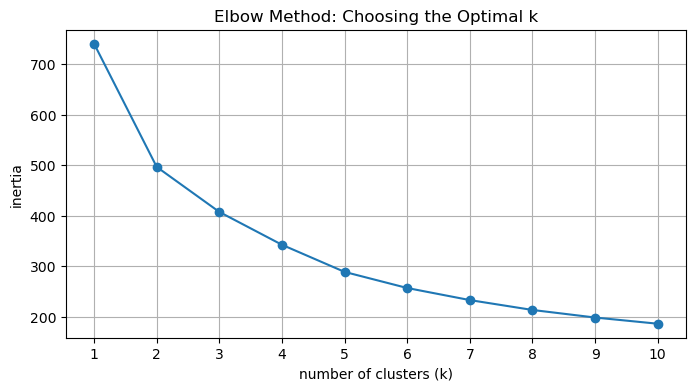

In [114]:
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xticks(cluster_range)
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.title('Elbow Method: Choosing the Optimal k')
plt.grid(True)
plt.show()

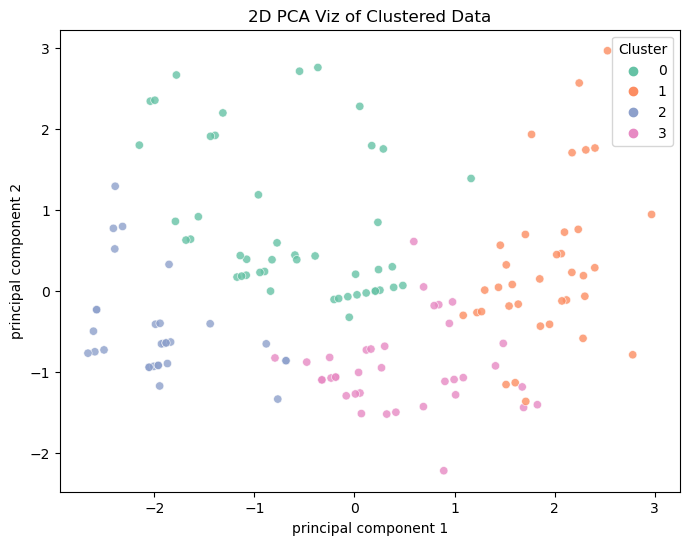

In [115]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=principal_components[:, 0],
    y=principal_components[:, 1],
    hue=df['Cluster'],
    palette='Set2',
    alpha=0.8
)
plt.title('2D PCA Viz of Clustered Data')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

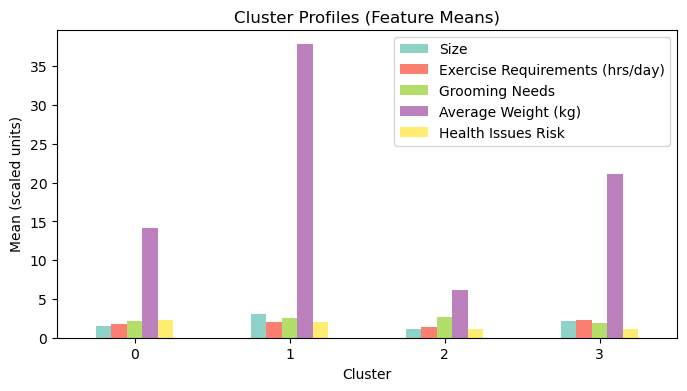

In [116]:
plt.ioff()

fig, ax = plt.subplots(figsize=(8,4))
center_of_volume.plot(kind='bar', ax=ax, colormap='Set3')
ax.set_ylabel('Mean (scaled units)')
ax.set_title('Cluster Profiles (Feature Means)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

fig.savefig('Cluster_Profiles.png', bbox_inches='tight')
plt.show()
plt.close(fig)

In [117]:
cols = [
    'Name',
    'Size',
    'Exercise Requirements (hrs/day)',
    'Grooming Needs',
    'Average Weight (kg)',
    'Health Issues Risk'
]
short = {
    'Exercise Requirements (hrs/day)': 'ExHrs',
    'Average Weight (kg)':            'Wt_kg',
    'Health Issues Risk':             'Risk'
}

for cluster_id in sorted(df['Cluster'].unique()):
    sub = df[df['Cluster'] == cluster_id]
    examples = (
        sub
        .sample(2, random_state=42)[cols]
        .rename(columns=short)
        .reset_index(drop=True)       
    )
    print(f"\nCluster {cluster_id+1} (n={len(sub)} breeds):")
    display(examples)                  



Cluster 1 (n=46 breeds):


,Name,Size,ExHrs,Grooming Needs,Wt_kg,Risk
0,Treeing Walker Coonhound,2.0,2.0,2,20.0,2
1,Rat Terrier,1.5,2.0,1,5.0,2



Cluster 2 (n=36 breeds):


,Name,Size,ExHrs,Grooming Needs,Wt_kg,Risk
0,Tibetan Mastiff,3.0,2.0,3,45.0,2
1,Doberman Pinscher,3.0,2.5,1,35.0,2



Cluster 3 (n=30 breeds):


,Name,Size,ExHrs,Grooming Needs,Wt_kg,Risk
0,Poodle (Miniature),1.0,1.5,4,7.0,1
1,Keeshond,2.0,1.5,3,16.0,1



Cluster 4 (n=36 breeds):


,Name,Size,ExHrs,Grooming Needs,Wt_kg,Risk
0,Whippet,2.0,2.0,1,8.0,1
1,Entlebucher Mountain Dog,2.0,2.5,1,27.0,1


In [118]:
for cluster_id in sorted(df['Cluster'].unique()):
    breeds = df[df['Cluster'] == cluster_id]['Name'].tolist()[:10]
    print(f"Cluster {cluster_id+1} ({len(breeds)} shown of {len(df[df['Cluster'] == cluster_id])} breeds):")
    for i, breed in enumerate(breeds, start=1):
        print(f"  {i}. {breed}")
    print()


Cluster 1 (10 shown of 46 breeds):
  1. Basset Hound
  2. Beagle
  3. Boston Terrier
  4. Cardigan Welsh Corgi
  5. Cavalier King Charles Spaniel
  6. Chinese Shar-Pei
  7. Chow Chow
  8. Clumber Spaniel
  9. Cocker Spaniel
  10. Collie

Cluster 2 (10 shown of 36 breeds):
  1. Afghan Hound
  2. Akita
  3. Alaskan Malamute
  4. American Bulldog
  5. Bernese Mountain Dog
  6. Black Russian Terrier
  7. Bloodhound
  8. Borzoi
  9. Bouvier des Flandres
  10. Boxer

Cluster 3 (10 shown of 30 breeds):
  1. Affenpinscher
  2. American Eskimo
  3. Australian Terrier
  4. Bichon Frise
  5. Border Terrier
  6. Brussels Griffon
  7. Cairn Terrier
  8. Chihuahua
  9. Chinese Crested
  10. Dandie Dinmont Terrier

Cluster 4 (10 shown of 36 breeds):
  1. Airedale Terrier
  2. American Foxhound
  3. Australian Cattle Dog
  4. Australian Shepherd
  5. Basenji
  6. Bearded Collie
  7. Border Collie
  8. Brittany
  9. Bull Terrier
  10. Canaan Dog

